In [44]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
raw_a = pd.read_csv("MR_A.csv")
raw_b = pd.read_csv("MR_B.csv")

df_A = pd.DataFrame({"id": raw_a['jatosStudyResultId'],
                     "counter_balance": raw_a['counterbalance'],
                     "condition": raw_a['condition'],
                     "rt": raw_a['response_time'],
                     "congruence": raw_a['congruence'],
                     "soa": raw_a['soa_condition']})
df_A = df_A.loc[df_A['soa'] != 'practice']
df_A.head()


df_B = pd.DataFrame({"id": raw_b['jatosStudyResultId'],
                     "counter_balance": raw_b['counterbalance'],
                     "condition": raw_b['condition'],
                     "rt": raw_b['response_time'],
                     "congruence": raw_b['congruence'],
                     "soa": raw_b['soa_condition']})
df_B = df_B.loc[df_B['soa'] != 'practice']
df_B.head()

df = pd.concat([df_A,df_B])


In [26]:
#df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Masked_repetition_priming_data-2022', index_col = 0).reset_index()
#df

,id,counter_balance,condition,rt,congruence,soa
0,799,A,Con_Synth,824,congruent,short
1,799,A,Con_Nat,796,congruent,short
2,799,A,Inc_Synth_Synth,881,incongruent,short
3,799,A,Con_Synth,1243,congruent,short
4,799,A,Con_Nat,1956,congruent,short
...,...,...,...,...,...,...
2755,773,B,Con_Nat,737,congruent,short
2756,773,B,Inc_Nat_Synth,788,incongruent,short
2757,773,B,Con_Synth,1047,congruent,short
2758,773,B,Con_Synth,955,congruent,short


<AxesSubplot:xlabel='soa', ylabel='rt'>

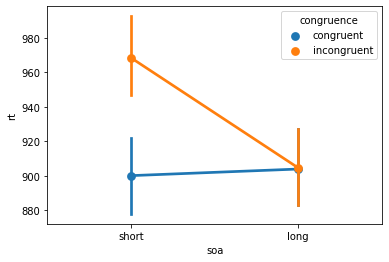

In [27]:
sns.pointplot(data = df, x = 'soa', y = 'rt', hue = 'congruence')

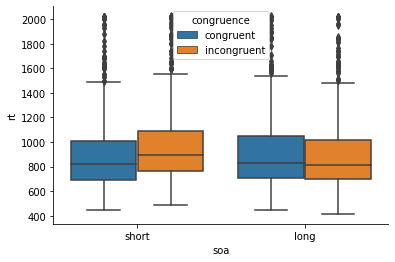

In [28]:
sns.boxplot(data = df, x = 'soa', y = 'rt', hue = 'congruence')
sns.despine()

<AxesSubplot:xlabel='soa', ylabel='rt'>

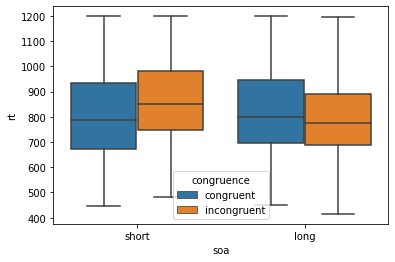

In [30]:
sns.boxplot(data = df.loc[df['rt'] < 1200], x = 'soa', y = 'rt', hue = 'congruence')

<AxesSubplot:xlabel='soa', ylabel='rt'>

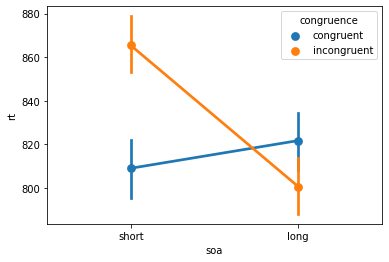

In [31]:
sns.pointplot(data = df.loc[df['rt'] < 1200], x = 'soa', y = 'rt', hue = 'congruence')

How many rows of data did we throw away, when we got rid of the "outliers"?

In [34]:
df.shape[0] - df.loc[df['rt'] < 1200].shape[0]

392

Did all the outliers come from the same person, or lots of different people?

In [47]:
outliers = df[df['rt'] > 1200]
outliers['id'].unique()

array([799, 796, 795, 794, 789, 788, 784, 777, 772, 770, 769, 802, 800,
       798, 797, 792, 791, 786, 783, 779, 776, 773])

It looks like it was lots of different people. Did _all_ the participants have some scores above 1200 ms? Let's compare the array of ID's of the participants in the full data set with the ID's of the participants who had some RT's longer than 1200 ms, to see if they are exactly the same:

In [49]:
np.array_equal(outliers['id'].unique(), df['id'].unique())

False

Ok, so there were some participants who never took over 1200 ms. Who were they, and how many of them were there?

In [50]:
speed_demons = [x for x in df['id'].unique() if x not in outliers['id'].unique()]
speed_demons

[785]

Ok, so there was actually only one participant who didn't have at least one "outlier" datapoint. Is there anything else unusual about this person's data? Let's plot participant 785's data together with everybody else's data (with outliers removed).

<AxesSubplot:xlabel='soa', ylabel='rt'>

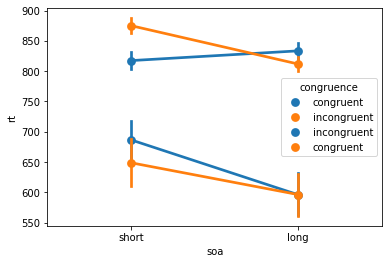

In [61]:

sns.pointplot(data = df.loc[((df['rt'] < 1200) & (df['id'] != 785))], 
              x = 'soa', y = 'rt', 
              hue = 'congruence')
sns.pointplot(data = df.loc[df['id'] == 785], x = 'soa', y = 'rt', hue = 'congruence')

No, not really. The overall pattern is the same, they are just substantially faster than everybody else. What about their accuracy? Were they fast, but sloppy?

['id', 'counter_balance', 'condition', 'rt', 'congruence', 'soa']